In [67]:
# Importing the basic python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?**

In [68]:
# Importing the flight dataset
df = pd.read_excel('flight_price.xlsx')

In [69]:
# Displaying top 5 records of the flight dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [70]:
# Checking the dataset dimension
df.ndim

2

In [71]:
# Checking the number of rows and columns in the dataset
df.shape

(10683, 11)

**Ans:** Looking at the codes above, we can conclude that the flight dataset is a 2-D dataset and it has 10683 rows and 11 columns.

**Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.**

To answer the above question, we will first carry out data cleaning process

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [73]:
# Splitting Date_of_Journey column into day, month, and year columns
df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [74]:
# Taking each item from the array after the split and storing them in new columns
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [75]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [76]:
# Dropping the Date_of_Journey column since we extracted three new columns from it
df.drop('Date_of_Journey', axis=1, inplace=True)

In [77]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  object
 12  Year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [79]:
# Changing data types of Date, Month, and Year column from object to int
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [81]:
# Let's now analyze the Arrival_Time column
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [82]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [83]:
# Splitting the Arrival_Time column into two new columns named Arrival_hour and Arrival_min
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [84]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [85]:
# dropping the Arrival_Time column
df.drop('Arrival_Time', axis=1, inplace=True)

In [86]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  object
 13  Arrival_min      10683 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [88]:
# Changing data type of Arrival_hour and Arrival_min column
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [90]:
# Performing the same cleaning operations on the Dep_Time column
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_min      10683 non-null  int64 
 13  Dept_hour        10683 non-null  int64 
 14  Dept_min         10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [92]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [93]:
# Checking unique values in the Total_Stops column
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [94]:
# We can see that the Total_Stops column comprises of 6 different values. We will map these object values into numeric values
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'nan':1})

In [95]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [96]:
# Checking null values in the Total_Stops column
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [97]:
# Since the 9039th record misses Route and Total_Stops values so we can drop this row
df.drop(9039, axis=0, inplace=True)

In [98]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min


In [99]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  float64
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  int64  
 8   Date             10682 non-null  int64  
 9   Month            10682 non-null  int64  
 10  Year             10682 non-null  int64  
 11  Arrival_hour     10682 non-null  int64  
 12  Arrival_min      10682 non-null  int64  
 13  Dept_hour        10682 non-null  int64  
 14  Dept_min         10682 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 1.3+ MB


In [101]:
# Managing the Duration column by changing it into either hours or minutes
def convert_into_minutes(Duration):
  total_minutes=0
  for i in Duration.split():
    if 'h' in i:
      total_minutes=int(i.replace('h',''))*60
    if 'm' in i:
      total_minutes=int(i.replace('m',''))
  return total_minutes

In [102]:
df['Duration']=df['Duration'].apply(convert_into_minutes)

In [103]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,50,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,25,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,25,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,45,1.0,No info,13302,1,3,2019,21,35,16,50


In [104]:
# Since Route and Additional_Info column is not of much importance so we can drop them
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10682 non-null  object 
 1   Source        10682 non-null  object 
 2   Destination   10682 non-null  object 
 3   Duration      10682 non-null  int64  
 4   Total_Stops   10682 non-null  float64
 5   Price         10682 non-null  int64  
 6   Date          10682 non-null  int64  
 7   Month         10682 non-null  int64  
 8   Year          10682 non-null  int64  
 9   Arrival_hour  10682 non-null  int64  
 10  Arrival_min   10682 non-null  int64  
 11  Dept_hour     10682 non-null  int64  
 12  Dept_min      10682 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [106]:
# Counting the total number of each value in the Airline column
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [107]:
# Changing the values in the Airline column into numerical values
df['Airline']=df['Airline'].map({'Jet Airways':0, 'IndiGo':1, 'Air India':2,'Multiple carriers':3,'Spice Jet':4,'Vistara':5,'Air Asia':6,'GoAir':7,'Multiple carriers Premium economy':8,'Jet Airways Business':9,'Vistara Premium economy':10,'Trujet':11})

In [108]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,1.0,Banglore,New Delhi,50,0.0,3897,24,3,2019,1,10,22,20
1,2.0,Kolkata,Banglore,25,2.0,7662,1,5,2019,13,15,5,50
2,0.0,Delhi,Cochin,1140,2.0,13882,9,6,2019,4,25,9,25
3,1.0,Kolkata,Banglore,25,1.0,6218,12,5,2019,23,30,18,5
4,1.0,Banglore,New Delhi,45,1.0,13302,1,3,2019,21,35,16,50


In [109]:
# Checking the value counts of the Source and Destination column and changing those values into numerical values
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [110]:
df['Source']=df['Source'].map({'Delhi':0,'Kolkata':1,'Banglore':2,'Mumbai':3,'Chennai':4})

In [111]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [113]:
df['Destination']=df['Destination'].map({'Cochin':0,'Banglore':1,'Delhi':2,'New Delhi':3,'Hyderbad':4,'Kolkata':5})

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       9864 non-null   float64
 1   Source        10682 non-null  int64  
 2   Destination   0 non-null      float64
 3   Duration      10682 non-null  int64  
 4   Total_Stops   10682 non-null  float64
 5   Price         10682 non-null  int64  
 6   Date          10682 non-null  int64  
 7   Month         10682 non-null  int64  
 8   Year          10682 non-null  int64  
 9   Arrival_hour  10682 non-null  int64  
 10  Arrival_min   10682 non-null  int64  
 11  Dept_hour     10682 non-null  int64  
 12  Dept_min      10682 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [115]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,1.0,2,NaN,50,0.0,3897,24,3,2019,1,10,22,20
1,2.0,1,NaN,25,2.0,7662,1,5,2019,13,15,5,50
2,0.0,0,NaN,1140,2.0,13882,9,6,2019,4,25,9,25
3,1.0,1,NaN,25,1.0,6218,12,5,2019,23,30,18,5
4,1.0,2,NaN,45,1.0,13302,1,3,2019,21,35,16,50


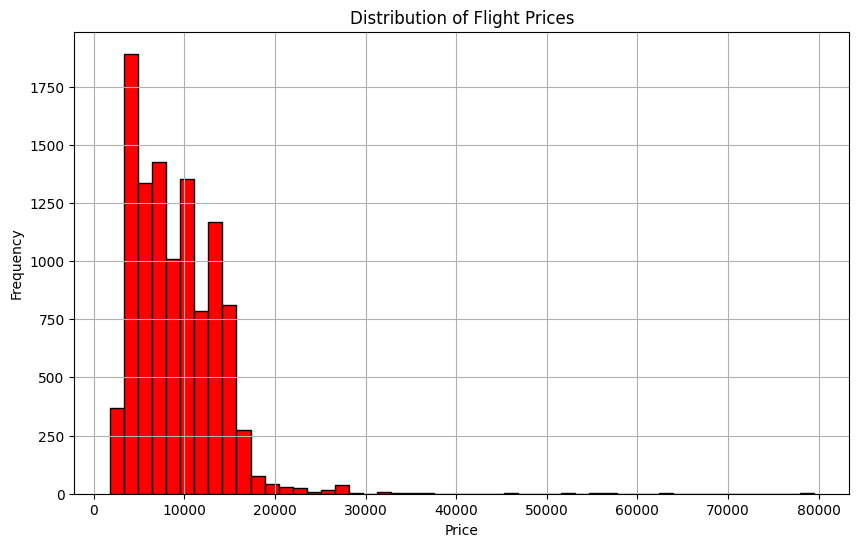

In [118]:
flight_prices = df['Price']
# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=50, color='red', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Q3. What is the range of prices in the dataset? What is the minimum and maximum price?**

In [120]:
# Getting stats of the Price column
price_stats = df['Price'].describe()

# Extracting information
price_range = price_stats['max'] - price_stats['min']
min_price = price_stats['min']
max_price = price_stats['max']

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")

Minimum Price: 1759.0
Maximum Price: 79512.0
Price Range: 77753.0


**Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.**

<ipython-input-121-0f3d97e25ad3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='viridis')


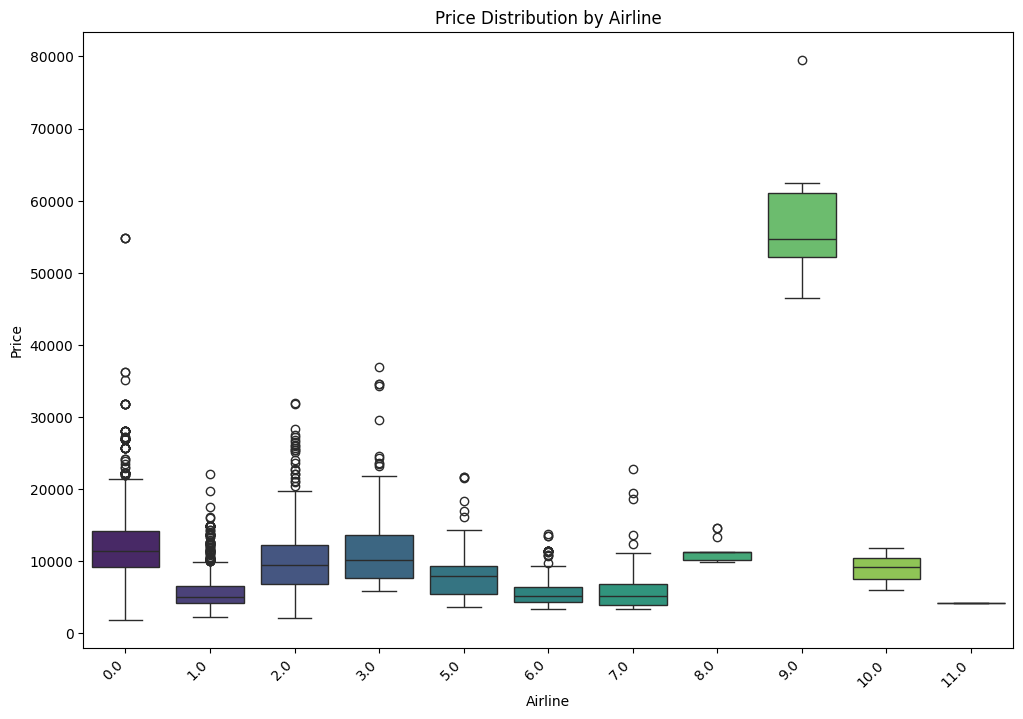

In [121]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df, palette='viridis')
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


#since we made airline data into 1-11 instead of airline name we can see number for each we have assisgned



**Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.**

Ans: yes, we do have outliers in our dataset as can be seen from the above box plot.
Here if we take the average price then the data above 20000 as per seen in the above box plot might affect the overall price.

**Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?**

**Ans:**
Following data must be analyzed in order tp identify the peak season:
1. Month and Seasonality:
   - Analyze the distribution of flight prices across different months.
   - Look for patterns or trends that indicate a peak season.
   - Consider the impact of holidays and special events.
2. Day of the Week:
   - Explore whether certain days of the week show higher demand and prices.
   - Business travelers may prefer weekdays, while leisure travelers might opt for weekends.
3. Duration of Flights:
   - Check if the duration of flights correlates with price fluctuations.
   - Longer durations might be associated with peak travel times.
4. Total Stops:
   - Investigate how the number of stops affects prices.
   - Non-stop or direct flights may be in higher demand during peak seasons.
5. Year:
   - Explore the data over different years to identify any long-term trends.
   - Consider external factors such as economic conditions or global events.

To present the findings to the boss, we can use combination of visualizations and key insights:

1. Line Plot for Monthly Trends
2. Bar Chart for Day of the Week
3. Boxplot for Flight Duration and Stops
4. Yearly Trends
5. Narrative Summary

**Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?**

**Ans:**
To identify trends in flight prices for a flight booking website, we can analyze several features that may influence pricing. Some visualizations might be:
Line plot or time series plot to show the trend over time.

*   Boxplots or line plots with seasonal breakdowns.
*   Bar chart or boxplot to compare prices on different days.
*   Scatter plot or boxplot to see if longer or shorter flights have different price distributions.
*   Grouped bar charts or boxplots to show price variations for each category.
*   Boxplots or bar charts to compare prices based on the number of stops.
*   Heatmap or grouped bar chart showing average prices for different routes.
*   Correlation matrix
*   Interaction plots or multi-variable visualizations.


**Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?**

**Ans:**
Being a data scientist working for an airline company, I'd select the following features to identify the factors that affect flight prices.
- Route and Distance
- Airlines
- Day and Time of Travel
- Duration and Stops
- Source and Destination Airports

I would use the following charts for visualization:
- Scatter plots or grouped bar charts showing average prices for different routes or distance categories.
- Violin plots, boxplots, or grouped bar charts for airline-wise price comparisons.
- Bar charts or boxplots showing average prices for different days and times.
- Scatter plots or boxplots to show the relationship between duration/stops and prices.
- Heatmap or grouped bar chart showing average prices for different airport combinations.
- Time series plots or annotated line charts.
- Develop interactive dashboards or tools that allow management to explore the data and understand the impact of various factors on prices.
